# 1. Data profiling

---

### Setup

---

In [1]:
import sys
sys.path.insert(1, '../utils')

import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# 1024 binary molecular fingerprints and 1 experimental class
column_names = ["bmf" + str(i) for i in range(1, 1025)] + ["exp"]

data = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=0, names = column_names)
data.shape

(8991, 1025)

## 1.1. Data dimensionality

---

### Number of records/variables

---

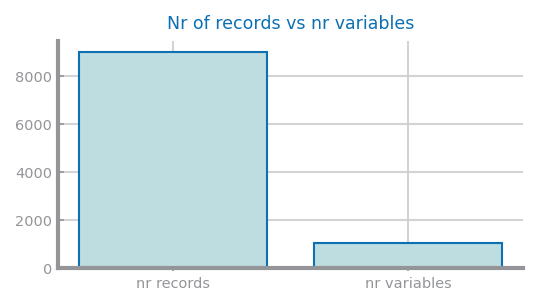

In [2]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

### Data types

---

In [3]:
data.dtypes

bmf1        int64
bmf2        int64
bmf3        int64
bmf4        int64
bmf5        int64
            ...  
bmf1021     int64
bmf1022     int64
bmf1023     int64
bmf1024     int64
exp        object
Length: 1025, dtype: object

In [4]:
cat_vars = data.select_dtypes(include='object')
data[cat_vars.columns] = data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
int_vars = data.select_dtypes(include='int64')
data[int_vars.columns] = data.select_dtypes(['int64']).apply(lambda x: x.astype('bool'))
data.dtypes

bmf1           bool
bmf2           bool
bmf3           bool
bmf4           bool
bmf5           bool
             ...   
bmf1021        bool
bmf1022        bool
bmf1023        bool
bmf1024        bool
exp        category
Length: 1025, dtype: object

### Missing values

---

In [ ]:
plt.figure()
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables', ylabel='nr missing values')
mv.values()

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Summary
***How many variables are there in the dataset?***

***1025*** variables

***And how many records?***

***8991*** records

***What is the ratio between the number of records and variables?***

There is a ratio of approximately ***8.772*** records per variable.

***What are the types for each variable?***

* 1024 binary molecular fingerprints - boolean values (int64)
* 1 experimental class - category

***How many missing values are there per variable?***

There are no missing values in the dataset

## 1.2. Data Distribution

---

### Symbolic Variables
Boxplots are not applicable to non-numeric variables. Lets identify their values and most frequent values (modes).

In [ ]:
data.describe().rename({'top': 'mode'}, axis='index')

Since we can't see the modes of each variable from the table we counted the number of variables with 1 or 0 as its mode. We can see that there are 41 binary molecular fingerprint variables with 1 as its mode and 983 with 0.

In [ ]:
print(data.mode().values.tolist()[0].count(1))
print(data.mode().values.tolist()[0].count(0))

In order to explore these 1025 variables, in terms of their distribution we will use histograms. But since there are too many variables we will only display the histograms of the first and last 5 variables.

In [ ]:
symbolic_vars = data.columns

rows, cols = ds.choose_grid(10)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT), squeeze=False)
i, j = 0, 0

m = 0
for n in list(range(0, 5)) + list(range(len(symbolic_vars) - 5, len(symbolic_vars))):
    counts = data[symbolic_vars[n]].value_counts()
    ds.bar_chart(counts.index.to_list(), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n],
                 xlabel=symbolic_vars[n], ylabel='nr records')
    i, j = (i + 1, 0) if (m+1) % cols == 0 else (i, j + 1)
    m += 1
plt.show()

### Summary

***What is the type and range for each variable?***

- **binary molecular fingerprint variables**:
    - type: Symbolic
    - range: [0, 1]
        
        
- **experimental class**:
    - type: Symbolic
    - range: [negative, positive]
        
        
***And its mean value, mode, standard deviation, and quartiles?***

- **binary molecular fingerprint variables**:
    - mode: Since we can't see the modes of each variable from the table we counted the number of variables with 1 or 0 as its mode. We can see that there are 41 binary molecular fingerprint variables with 1 as its mode and 983 with 0.
        
        
- **experimental class**:
    - mode: negative

***Are there outliers?***

**No**, there are no outliers.

***Is it possible to identify each variable distribution?***

Yes, it is possible, except for time.
- **binary molecular fingerprint variables**:
    - distribution: Bernoulli since they're binary variables
        
        
- **experimental class**:
    - distribution: Bernoulli since it's a binary variable

## 1.3. Data Granularity

---

### Summary

***What is the most atomic granularity for each variable?***

It will be equal to the number of different values the each variable takes :

In [ ]:
print(data.nunique())

Because all variables are binary, it will be 2 to all of them.

***What is the best granularity to discretize each numeric variable?***

Since, like we said above, all variables are binary, they're already discretized.

***Are there any hierarchy of concepts for symbolic variables, either from data or domain knowledge?***
    
**No**, there isn't any hierarchy of concepts for those symbolic variables.

## 1.4. Data Sparsity

---

We consider it is not useful to generate scatterplots for this dataset, since all variables have a very limited range of different values (1024 boolean and 1 categoric). 

In [ ]:
import numpy as np

np_data = data.to_numpy()

# Convert target variable to binary
for line in np_data:
    line[len(line) - 1] = int(line[len(line) - 1] == "positive")

np_data = np_data.astype("float64")
conjugate = 1-np_data

In [ ]:
M11 = np_data.T.dot(np_data)
M01 = conjugate.T.dot(np_data)
M10 = np_data.T.dot(conjugate)
M00 = conjugate.T.dot(conjugate)

count = M11 * M01 * M10 * M00

'''
Ex.:
         [1, 1]
         [1, 0]
         [0, 1]
[1, 1, 0] 2  1
[1, 0, 1] 1  2

         [1, 1]
         [1, 0]
         [0, 1]
[0, 0, 1] 0  1
[0, 1, 0] 1  0

         [0, 0]
         [0, 1]
         [1, 0]
[1, 1, 0] 0  1
[1, 0, 1] 1  0

         [0, 0]
         [0, 1]
         [1, 0]
[0, 0, 1] 1  0
[0, 1, 0] 0  1

'''

maxCounts = np.zeros((len(count), len(count)))
numAnomalies = np.zeros((len(count), len(count)))


numAllCombs = 0
LIMIT = 0.1

for y in range(0, len(count) - 1):
    for x in range(y + 1, len(count)):
        numAllCombs += int(bool(count[y, x]))
        
        maxCounts[y, x] = max(M11[y, x], M01[y, x], M10[y, x], M00[y, x])

        for m in (M11, M01, M10, M00):
            if m[y, x] / maxCounts[y, x] < LIMIT:
                numAnomalies[y, x] += m[y, x]
        
print("Anomalies per pair of variables:")        
print(numAnomalies)

print()

print("%f%% of the pairs are missing at least one combination ((0, 0), (0, 1), (1, 0) or (1, 1))" % \
      ((1 - 2 * numAllCombs / (len(count) ** 2 - len(count))) * 100))



### Correlation analysis

---

In [ ]:
import seaborn as sns

corr_mtx = data.corr()

In [ ]:
high_corrs = []

for x in corr_mtx:
    for y in corr_mtx:
        if x == y:
            break
        corr = corr_mtx[x][y]
        if abs(corr) >= 0.5:
            high_corrs.append((x, y, corr))

high_corrs.sort(key = lambda t: t[2], reverse = True)
for t in high_corrs:
    print("(%s, %s): %f" % t)

### Summary

---

***Is the dataset enough to cover the entire domain?***
Yes, although there are some, but few (about 0.18%), combinations of variables that are not totally covered by the records.

***Are there clusters of records?***

As we explained above, it does not make sense to draw scatterplots for symbolic variables, and therefore, we cannot identify clusters.

***Is it possible to identify any anomalies?***

As each pair of variables can only have 4 possible combinations of values, there will not exist any isolated records. However, we can find some combinations of values which occur much less frequently than others for a given pair of variables.

***Are there dependent variables?***

**Yes**, there are many pairs of dependent variables, as we can see in the output above. Some of the most noticeable correlations (above 95%) are:

- (bmf760, bmf415): 0.981484

- (bmf872, bmf686): 0.975299

- (bmf684, bmf261): 0.972491

- (bmf872, bmf759): 0.971217

- (bmf820, bmf457): 0.970802

- (bmf961, bmf289): 0.970225

- (bmf759, bmf647): 0.969674

- (bmf406, bmf179): 0.969385

- (bmf409, bmf117): 0.967022

- (bmf425, bmf350): 0.964961

- (bmf759, bmf686): 0.964154

- (bmf872, bmf647): 0.962569

- (bmf474, bmf468): 0.960604

- (bmf759, bmf79): 0.959786

- (bmf657, bmf466): 0.957167

- (bmf872, bmf79): 0.956570

- (bmf647, bmf79): 0.955328

- (bmf54, bmf47): 0.955249

- (bmf686, bmf647): 0.954458

- (bmf686, bmf79): 0.951767

- (bmf658, bmf384): 0.950914

We noticed that, for instance, "bmf79", "bmf686" and "bmf759" appear in more than 3 pairs, so they are almost redundant. 

In [ ]:
data.to_csv('qsar_oral_toxicity_after_profiling.csv', sep=';', index=False)